In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [2]:
def convert_feature_one_hot_encoder(df: pd.DataFrame, feature: str) -> pd.DataFrame:
    """
    This method receives a Pandas dataframe and convert some features using the One Hot Encoder
    
    :param df: A Pandas dataframe
    :param feature: The name of the feature to convert
    :return: A Pandas dataframe with the features converted
    """
    ohe = OneHotEncoder()
    ohe.fit(df[feature].to_numpy().reshape(-1, 1))
    transformed = ohe.transform(df[feature].to_numpy().reshape(-1, 1)).toarray()
    columns = []
    for c in ohe.get_feature_names_out():
        columns.append(c.replace("x0", feature))
    ohe_df = pd.DataFrame(transformed, columns=columns)
    # Concats the result with the original data
    return pd.concat([df, ohe_df], axis=1)

In [3]:
df = pd.read_csv("dados/bank_t2.txt", delimiter = "\t")

In [4]:
df.head()

,age,marital,education,housing.loan,personal.loan,contact,day.of.week,duration.contact,number.contatcs.campaign,poutcome,term.deposit
0,30,married,basic,1,0,cellular,fri,487,2,nonexistent,0
1,39,single,high.school,0,0,telephone,fri,346,4,nonexistent,0
2,25,married,high.school,1,0,telephone,wed,227,1,nonexistent,0
3,47,married,university.degree,1,0,cellular,mon,58,1,nonexistent,0
4,32,single,university.degree,0,0,cellular,thu,128,3,failure,0


In [5]:
df.describe()

,age,housing.loan,personal.loan,duration.contact,number.contatcs.campaign,term.deposit
count,3836.000000,3836.000000,3836.000000,3836.000000,3836.000000,3836.000000
mean,40.001564,0.543796,0.167101,256.438478,2.535975,0.108186
std,10.236627,0.498143,0.373115,256.860414,2.583371,0.310655
min,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,32.000000,0.000000,0.000000,103.000000,1.000000,0.000000
50%,38.000000,1.000000,0.000000,180.000000,2.000000,0.000000
75%,47.000000,1.000000,0.000000,316.000000,3.000000,0.000000
max,88.000000,1.000000,1.000000,3643.000000,35.000000,1.000000


In [6]:
columns_to_convert = ["marital", "education", "contact", "day.of.week", "poutcome"]
for c in columns_to_convert:
    df = convert_feature_one_hot_encoder(df, c)
    
df.drop(columns_to_convert, axis=1, inplace=True)

# Normalizing all features between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(df.values)
data = scaler.transform(df.values)

### Searching for the best K

C:\Users\julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


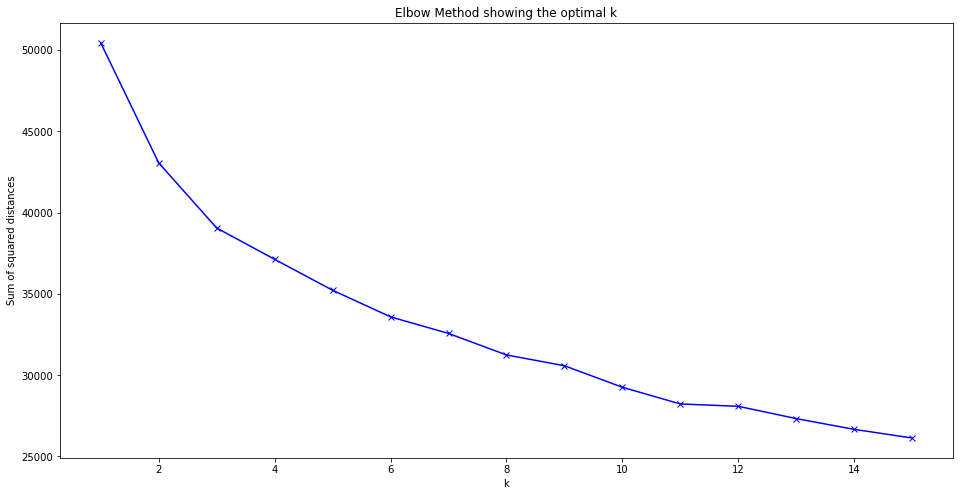

In [7]:
# Clusters size. From 1 to 20
k_clusters = [i for i in range(1,16)]
results = []
labels = []

for k in k_clusters:
    k_means = KMeans(n_clusters=k, random_state=0)
    k_means.fit(data)
    results.append(k_means.inertia_)

plt.figure(figsize=(16,8))
plt.plot(k_clusters, results, "bx-")
plt.xlabel("k")
plt.ylabel("Sum of squared distances")
plt.title("Elbow Method showing the optimal k")
plt.show()


#### As we can see in the graph above, it is hard to distinguish the "elbow" of the curve. 
#### Giving the behaviour of the curve, we could chose between 3, 4 and 5.
#### To help to decide what cluster is the best approach, we decided tocreate some visualization using the three clusters generated.

### 3 clusters

In [8]:
k_means = KMeans(n_clusters=3, random_state=0)
k_means.fit(data)
labels = k_means.predict(data)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents, columns = ["principal component 1", "principal component 2"])
finalDf = pd.concat([principalDf, pd.DataFrame(data=labels, columns=["target"])], axis = 1)

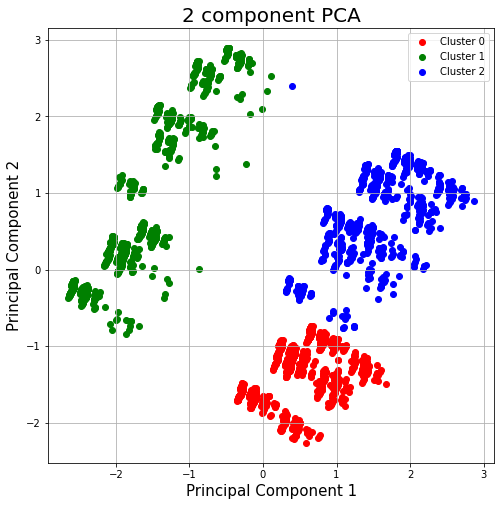

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel("Principal Component 1", fontsize = 15)
ax.set_ylabel("Principal Component 2", fontsize = 15)
ax.set_title("2 component PCA", fontsize = 20)
targets = [0, 1, 2]
colors = ["r", "g", "b"]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf["target"] == target
    ax.scatter(finalDf.loc[indicesToKeep, "principal component 1"], 
               finalDf.loc[indicesToKeep, "principal component 2"], c = color)
ax.legend(["Cluster 0", "Cluster 1", "Cluster 2"])
ax.grid()
plt.show()

### 4 clusters

In [10]:
k_means = KMeans(n_clusters=4, random_state=0)
k_means.fit(data)
labels = k_means.predict(data)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents, columns = ["principal component 1", "principal component 2"])
finalDf = pd.concat([principalDf, pd.DataFrame(data=labels, columns=["target"])], axis = 1)

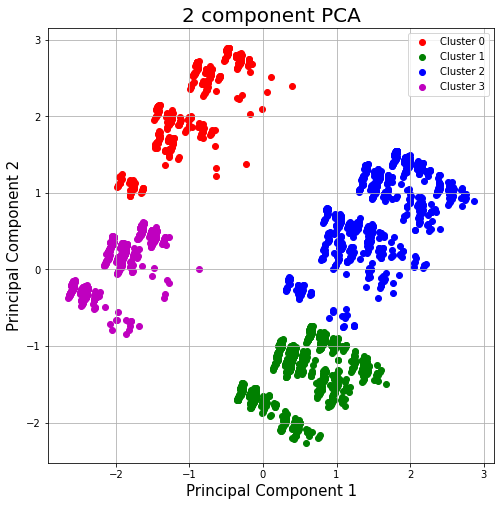

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel("Principal Component 1", fontsize = 15)
ax.set_ylabel("Principal Component 2", fontsize = 15)
ax.set_title("2 component PCA", fontsize = 20)
targets = [0, 1, 2, 3]
colors = ["r", "g", "b", "m"]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf["target"] == target
    ax.scatter(finalDf.loc[indicesToKeep, "principal component 1"], 
               finalDf.loc[indicesToKeep, "principal component 2"], c = color)
ax.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"])
ax.grid()
plt.show()

### 5 clusters

In [13]:
k_means = KMeans(n_clusters=5, random_state=0)
k_means.fit(data)
labels = k_means.predict(data)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents, columns = ["principal component 1", "principal component 2"])
finalDf = pd.concat([principalDf, pd.DataFrame(data=labels, columns=["target"])], axis = 1)

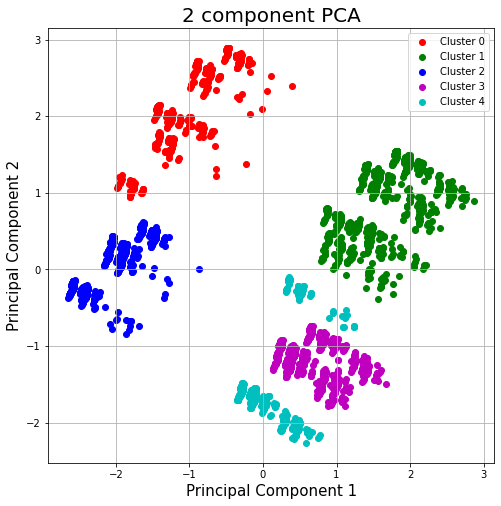

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel("Principal Component 1", fontsize = 15)
ax.set_ylabel("Principal Component 2", fontsize = 15)
ax.set_title("2 component PCA", fontsize = 20)
targets = [0, 1, 2, 3, 4]
colors = ["r", "g", "b", "m", "c"]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf["target"] == target
    ax.scatter(finalDf.loc[indicesToKeep, "principal component 1"], 
               finalDf.loc[indicesToKeep, "principal component 2"], c = color)
ax.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"])
ax.grid()
plt.show()